In [1]:
using Interact, Plots, DifferentialEquations

WebIO._IJuliaInit()

# Flujos2D no lineales

Para el Flujo 2D general:

$\dot{x} = f(x,y)$

$\dot{y} = g(x,y)$

los puntos fijos seran aquellos que satisfacen simultaneamente

$f(x,y) = 0$

$g(x,y) = 0$

Cada una de estas ecuaciones se puede ver como la forma implicita de una curva en el plano $(x,y)$ y se conoce como *nulclina*. Podemos representar esas dos curvas en el plano (la nulclina de $\dot{x}=0$ y la nulclina de $\dot{y}=0$). Los puntos fijos estaran entonces en los puntos donde se corten estas dos curvas. Claramente para el caso lineal las nulclinas son dos rectas que de forma generica se cortan en solo un punto. Mientras que para el caso no lineal esas curvas pueden ser arbitrarias y se pueden cortar en varios puntos.

Vamos a ver algunos modelos no lineales sencillos y "clasicos" para estudiarlos numericamente. Mas adelante vamos a calcular de forma mas analítica los puntos fijos y su estabilidad (y por ende sus posibles bifurcaciones), pero por ahora vamos a explorarlos de forma interactiva

# Modelo de Predador-Presa Lotka Volterra

Los modelos de dinamica de poblaciones en 1D se pueden escribir de forma general como 

$\dot{x} = R(x) x$

donde $R(x)$ es la tasa de reproduccion y extincion de la especie. Por ejemplo $R(x)=R(1-x/K)$ para la ecuacion logistica o $R=R(1-x/K)-\frac{x}{1+x^2}$ para la logistica con outbreak. Si ahora tenemos dos especies y una preda a la otra podemos esperar de forma general que la tasa de reproduccion y extincion dependa de ambas poblaciones, es decir:

$\dot{x} = R(x,y) x$

$\dot{y} = S(x,y) y$

De forma independiente Vito Volterra (1926) y Alfred Lotka (en realidad proponiendo un modelo para las reacciones autocataliticas), propusieron la siguiente forma sencilla para la tasa de crecimiento de la presa $R(x-y)=b-cy$ donde $b$ es la tasa de crecimiento de la especie y $c$ es el impacto de la predación. Notar que el crecimiento no depende de los predadores pero su extincion si. Mientras que para la poblacion de predadores sucede a la inversa, su crecimiento depende de la existencia de presa (podemos pensar que aumenta la capacidad del sistema) mientras que su extincion no (es fija por muerte natural). En ese caso $S(x,y)=ax-d$.

Las ecuaciones de Lotka Volterra son entonces

$\dot{x} = (b-cy)x$

$\dot{y} = (ax-d)y$

Notar que hay terminos lineales: $bx$ crecimiento de la poblacion de presa, $-dy$ extincion de la poblacion de predadores que no dependen de la interaccion. Y por otro lado hay dos terminos que dependen de la interaccion, es decir del producto entre las dos poblaciones: $-cxy$ el impacto de la predacion en la poblacion de presa, y $axy$ el impacto de la poblacion de presa (recursos disponibles) en la capacidad de la poblacion de predadores.

Los puntos fijos son aquellos $(x,y)$ que hacen que **ambas** ecuaciones se hagan cero. Vamos a ver mas adelante como calcularlos pero por ahora se puede ver por simple inspeccion que un punto fijo es el $(0,0)$ porque cuando $x=0$ la primera ecuacion se anula y cuando $y=0$ se anula la segunda. Esto tiene sentido, si no hay predadores ni presas el sistema no evoluciona. El otro punto fijo va a darse cuando los valores de $(x,y)$ anulen los parentesis es decir cuando $x=d/a$  $y=b/c$. Este es un punto de equilibrio que mas adelante vamos a poder determinar que es un centro. Todas las soluciones son orbitas cerradas entorno a este equilibro. Es decir que el modelo de Lotka Volterra lleva a la oscilacion de las poblaciones, algo que se observa en muchos sistemas simples.

Los valores de los parametros son siempre positivos, pero ademas hay dos parametros ($a$ y $c$) que no pueden ser cero porque harian "explotar" el sistema (el centro se mueve a infinito).

In [15]:
function volterra!(du,u,p,t)
    (a,b,c,d) = p
    du[1] = (b-c*u[2])*u[1]
    du[2] = (a*u[1]-d)*u[2]
    du
end    

volterra! (generic function with 1 method)

In [16]:
@manipulate throttle=.05 for u1=0:0.1:1,u2=0.1:0.1:1,a=0.1:0.1:1,b=0:0.1:1,c=0.1:0.1:1,d=0:0.1:1
    sol = solve(ODEProblem(volterra!, [u1; u2], (0, 100), [a,b,c,d]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["u1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 11, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
6, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000059f673a0, Task (runnable) @0x0000000059f673a0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10943241421955904899\",\"id\":\"8254011915146506440\",\"type\":\

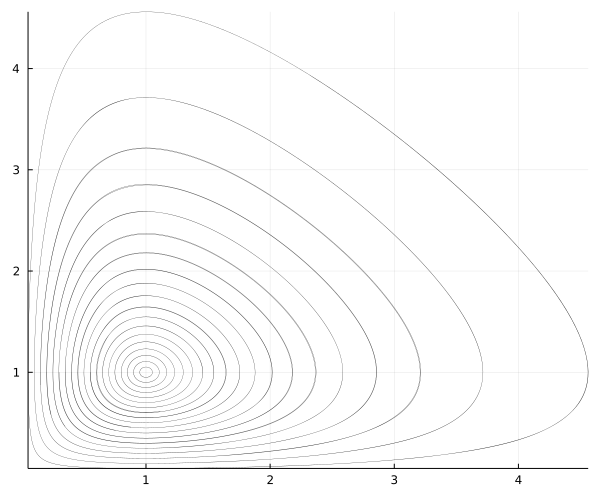

In [22]:
# Multiples trayectorias
u0_arr=0.05:0.05:1.0
a=0.5;b=0.5;c=0.5;d=0.5
function prob_func(prob,i,repeat)
  remake(prob,u0=[u0_arr[i];b/c])
end
prob = ODEProblem(volterra!,[0.1; b/c], (0, 30), [a,b,c,d]);
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),color=:black,linewidth=0.2,size = (600,500))

# Modelo simple de epidemia. SIR

EL modelo mas simple de propagacion de epidemia (propuesto en 1927 por Kermack & McKendrik) considera una poblacion  constante dividida en tres "compartimentos": los Suceptibles $S$ (individuos que pueden contagiarse), los Infectados $I$, y los Recuperados $R$ que no se vuelven a contagiar. Como la suma de los tres es constante en realidad se trata de un modelo 2D, pero lo usual es escribir las ecuaciones diferenciales para las tres poblaciones:

$\dot{S} = -\beta SI$

$\dot{I} = \beta SI - \gamma I$

$\dot{R} = \gamma I$

donde usamos la poblacion normalizada ($S+I+R=1$). Como $R$ no aparece en las dos primeras ecuaciones podemos resolver esas dos primeras y luego calcular $R=1-S-I$

Este es un sistema bastante particular porque $I=0$ anula las tres ecuaciones, con lo cual hay "infinitos" puntos fijos sobre esa recta. Esto quiere decir que el estado final depende de los parametros y el valor inicial pero puede ser cualquier punto sobre esa recta (va a depender de la historia del sistema)

In [4]:
function sir!(du,u,p,t)
    du[1] = -p[1]*u[1]*u[2]
    du[2] = p[1]*u[1]*u[2]-p[2]*u[2]
    du
end    

sir! (generic function with 1 method)

In [5]:
@manipulate throttle=0.5 for infectados=0:0.01:1, β=0:0.01:1,γ=0:0.01:1,tmax=10:10:500
    sol = solve(ODEProblem(sir!, [1.0-infectados; infectados], (0, tmax), [β,γ]));
    p1 = plot(sol,vars=(0,1),label="Suceptibles")
    plot!(p1,sol,vars=(0,2),label="Infectados")
    plot!(p1,sol,vars=((t,x,y)->(t,1-x-y),0,1,2),label="Recuperados")
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450))
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["infectados"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000005a7d0970, Task (runnable) @0x000000005a7d0970), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\

Probar que pasa con una tasa de recuperacion de diez dias ($\gamma = 0.1$) y una tasa de transmision maxima ($\beta  = 1$. Aun con una cantidad de infectados inicial del $1\%$ se llega a un pico de infectados de casi el $70\%$ antes de los 10 dias. Si se disminuye la tasa de contagio (por ejemplo restringiendo los contactos mediante una cuarentena) baja el valor de $\beta$ y se aplana la curva.

# Modelo de Predador-Presa mas realista

Si bien el modelo de Lotka-Volterra es no lineal, no presenta una caracteristica generica de muchos sistemas que es la estabilidad estructural, es decir que el flujo no cambie cualitativamente para pequeñas perturbaciones. Por ejemplo las soluciones dependen de la condicion inicial y si en algun momento perturbamos una orbita, saltamos a la de al lado y nunca volvemos a la orbita original (algo que sucede en sistemas conservativos pero que no es muy util para dinamica de poblaciones o sistemas naturales con disipacion donde las soluciones suelen ser robustas o estructuralmente estables).

Para empezar podemos reemplazar el termino de crecimiento exponencial $bx$ de la presa por un crecimiento logistico con una capacidad $K$. Luego en lugar de asumir que el impacto de la predacion en la poblacion de la presa es siempre proporcional al producto de la presa por el predador podemos asumir que satura en un momento determinado (el predador no es insaciable). Si $N$ es la poblacion de la presa y $P$ la del predador la ecuacion para la varicion de la poblacion de la presa seria:

$\dot{N}=RN \displaystyle \left( 1-  \frac{N}{K} \right) - PNf(N)$

Con $f(N)$ una funcion que satura, vamos a tomar una forma simple $f(N) = A/(N+C)$.

Por otro lado podemos suponer simplemente para la poblacion del predador $P$ un crecimiento logistico donde la capacidad es proporcional a la poblacion de la presa con lo cual la segunda ecuacion quedaria:

$\dot{P}=SP\displaystyle \left(1-\frac{P}{BN}\right)$

Tenemos seis parametros ($R,S,K,A,B,C$), pero se pueden reducir si adimensionalizamos las poblaciones y redefinimos parametros: $x=N/K$ $y=P/(BK)$ $a=BA/(KR)$, $b=S/R$, $c=C/K$ y el tiempo $t->t/R$. Con estos cambios las ecuaciones para las poblaciones adimensionalizadas de presa ($x$) y predador ($y$) quedan escritas:

$\dot{x} = x(1-x)-\displaystyle \frac{axy}{x+c}$

$\dot{y} = by\displaystyle \left( 1-\frac{y}{x}\right)$

que depende solo de tres parametros $a,b,c$. La contra es que ahora los parametros son mas dificiles de interpretar. Por ejemplo $b$ representa como es la tasa de crecimiento de la poblacion de predadores **relativa** a la tasa de crecimiento de la poblacion de presas, $c$ esta vinculada a la fraccion de la poblacion maxima de presa a la que satura la predacion, pero $a$ es mas dificil de interpretar ya que crece tanto con la accion de la predacion como con la capacidad de la poblacion de los predadores relativa a la capacidad de la poblacion de la presa.

Mas adelante vamos a calular los puntos fijos y la estabilidad, pero una caracteristica que se puede observar es que hay dos regimenes. Para un valor fijo de $a>0.5$ las dos poblaciones llegan a un punto fijo con un mismo valor $x=y$ para valores de $b$ y $c$ altos, pero si esto parametros disminuyen las poblaciones comienzan a oscilar. A diferencia del modelo de Lotka-Volterra, esta oscilacion es estructuralmente estable, todas las trayectorias convergen a esa oscilacion que se conoce como ciclo limite. 

In [2]:
function predatorprey!(du,u,p,t)
    du[1] = u[1]*((1.0-u[1]) - p[1]*u[2]/(p[3]+u[1]))
    du[2] = p[2]*u[2]*(1.0-u[2]/u[1])
    du
end    

predatorprey! (generic function with 1 method)

In [3]:
@manipulate throttle=0.5 for u1=0.1:0.1:1,u2=0.1:0.1:1,a=0.01:0.01:1.0,b=0.01:0.01:1.0,c=0.01:0.01:1.0,tmax=10:10:500
    sol = solve(ODEProblem(predatorprey!, [u1; u2], (0, tmax), [a,b,c]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450))
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["u1"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
5, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Camilo\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Camilo\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000005ec10c90, Task (runnable) @0x000000005ec10c90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.2\",\"0.3\",\"0.4\",\"0.5\",\"0.6\",\"0.7\",\"0.8\",\"0.9\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4333764577330245387\",\"id\":\"3683552491595322423\",\"type\":\"observab

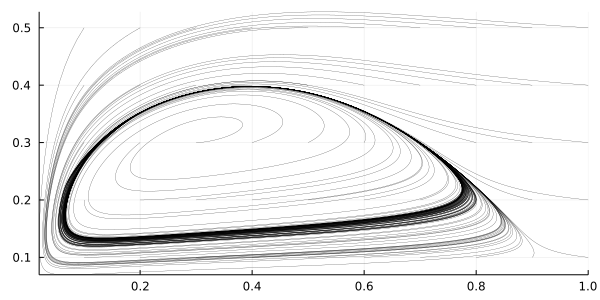

In [6]:
# Multiples trayectorias
u0_arr = vec([[0.1*i,0.1*j] for i=1:10, j=1:5])
a=0.9;b=0.1;c=0.1
function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end
prob = ODEProblem(predatorprey!,[0.1; 0.3], (0, 100), [a,b,c]);
sol = solve(EnsembleProblem(prob,prob_func=prob_func),EnsembleThreads(),trajectories=length(u0_arr))
plot(sol,vars=(1,2),linewidth=0.2,color=:black,size = (600,300))

In [ ]:
@manipulate throttle=0.5 for u1=0.1:0.1:1,u2=0.1:0.1:1,a=0:0.01:1.0,b=0:0.01:1.0,c=0:0.01:1.0,tmax=10:10:500
    sol = solve(ODEProblem(predatorprey!, [u1; u2], (0, tmax), [a,b,c]));
    p1 = plot(sol)
    p2 = plot(sol,vars=(1,2),arrow=true)
    plot(p1,p2,layout=(1,2),size = (900,450))
end   